In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pre-processing Data parameter lamost untuk SNR

In [5]:
lamostfull = pd.read_csv('lamost_full')
lamostfull.head(3)

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,tcomment,offsets,offsets_v,ra,dec,wd_subclass,teff,teff_err,logg,logg_err
0,101076,G12763484624375,2676893926929699200,J220838.58-013731.7,2011-10-24,55859,55858,F5902,1,76,...,.,0,0.0,332.160763,-1.625490,DA,-9999.00,-9999.00,-9999.000,-9999.000
1,101151,G12762587004699,2677056689010163456,J220823.66-011534.2,2011-10-24,55859,55858,F5902,1,151,...,.,0,0.0,332.098588,-1.259508,DA,24000.00,672.02,8.263,0.076
2,112211,G13351718912434,2679476512239443328,J221640.39+012741.2,2011-10-24,55859,55858,F5902,12,211,...,.,0,0.0,334.168324,1.461445,DA,17122.64,221.39,7.933,0.037


In [6]:
lamostfull = lamostfull[(lamostfull.wd_subclass == 'DA') | (lamostfull.wd_subclass == 'DAZ')]

In [7]:
lamostfull['meansnr'] = (lamostfull.snru + lamostfull.snrg + lamostfull.snrr + lamostfull.snri + lamostfull.snrz)/5

In [8]:
snr10 = lamostfull[(lamostfull.meansnr <= 10) & (lamostfull.meansnr >= 0)]
print('jumlah data dengan snr <= 10 : '+str(len(snr10)))
print('jumlah sub-kelas DA : ' + str(len(snr10[snr10.wd_subclass == 'DA'])))
print('jumlah sub-kelas DAZ : ' + str(len(snr10[snr10.wd_subclass == 'DAZ'])))

jumlah data dengan snr <= 10 : 9660
jumlah sub-kelas DA : 8630
jumlah sub-kelas DAZ : 1030


In [9]:
snr50 = lamostfull[(lamostfull.meansnr <= 50) & (lamostfull.meansnr > 10)]
print('jumlah data dengan snr <= 50 : '+str(len(snr50)))
print('jumlah sub-kelas DA : ' + str(len(snr50[snr50.wd_subclass == 'DA'])))
print('jumlah sub-kelas DAZ : ' + str(len(snr50[snr50.wd_subclass == 'DAZ'])))

jumlah data dengan snr <= 50 : 4436
jumlah sub-kelas DA : 4053
jumlah sub-kelas DAZ : 383


In [10]:
snr100 = lamostfull[lamostfull.meansnr > 50]
print('jumlah data dengan snr <= 100 : '+str(len(snr100)))
print('jumlah sub-kelas DA : ' + str(len(snr100[snr100.wd_subclass == 'DA'])))
print('jumlah sub-kelas DAZ : ' + str(len(snr100[snr100.wd_subclass == 'DAZ'])))

jumlah data dengan snr <= 100 : 550
jumlah sub-kelas DA : 525
jumlah sub-kelas DAZ : 25


## Data spektrum

In [11]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [12]:
data.drop(data.columns[2410:3579], axis=1, inplace=True)
data.head(5)

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,1.401641,-15.924921,12.17053,43.935257,13.352866,-0.958922,30.751305,17.331050,11.543040,-10.870653,...,4.525449,5.095497,4.234928,4.794764,5.965820,4.234310,4.073895,6.162295,4.391887,DA
1,0.340451,39.321850,96.95255,59.952780,49.579453,2.106772,30.853228,68.127846,38.738255,30.705740,...,8.622414,10.219061,9.293289,8.402941,7.801483,7.767938,7.887807,9.083275,10.359595,DA
2,90.410576,72.741806,80.37630,81.740350,95.025150,96.718460,59.218792,91.619460,76.982025,79.829170,...,32.816840,32.305386,30.800816,35.627293,34.485073,33.750920,30.536829,30.124290,32.247017,DA
3,82.717730,104.292206,87.98204,97.919210,95.674380,96.730340,121.290480,92.193184,115.548490,109.607440,...,23.460505,22.019167,23.856443,22.434275,23.262499,24.345755,23.040964,21.792454,21.794620,DA
4,-0.785483,2.712233,16.83574,1.124182,4.654962,7.689255,4.296149,7.754487,2.004906,8.411777,...,7.451107,8.597365,6.658686,5.471281,4.953662,4.457098,4.703722,5.737448,4.277687,DA


In [13]:
dadaz = [
    'DA' 
]

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [14]:
data['wd_subclass'].value_counts(normalize=True)*100

1    90.148686
0     9.851314
Name: wd_subclass, dtype: float64

In [15]:
data['obsid'] = lamostfull['obsid']

# Untuk snr 10-50-100

In [16]:
snr10 = snr10[['wd_subclass','obsid']]

In [17]:
snr10 = pd.merge(snr10, data, on = "obsid", how = "inner")

In [18]:
print('jumlah data dengan snr <= 10 : '+str(len(snr10)))
print('jumlah sub-kelas DA : ' + str(len(snr10[snr10.wd_subclass_x == 'DA'])))
print('jumlah sub-kelas DAZ : ' + str(len(snr10[snr10.wd_subclass_x == 'DAZ'])))

jumlah data dengan snr <= 10 : 9133
jumlah sub-kelas DA : 8130
jumlah sub-kelas DAZ : 1003


In [19]:
snr10.head(3)

,wd_subclass_x,obsid,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass_y
0,DA,101076,1.401641,-15.924921,12.17053,43.935257,13.352866,-0.958922,30.751305,17.331050,...,4.525449,5.095497,4.234928,4.794764,5.965820,4.234310,4.073895,6.162295,4.391887,1
1,DA,101151,0.340451,39.321850,96.95255,59.952780,49.579453,2.106772,30.853228,68.127846,...,8.622414,10.219061,9.293289,8.402941,7.801483,7.767938,7.887807,9.083275,10.359595,1
2,DA,112211,90.410576,72.741806,80.37630,81.740350,95.025150,96.718460,59.218792,91.619460,...,32.816840,32.305386,30.800816,35.627293,34.485073,33.750920,30.536829,30.124290,32.247017,1


### Train test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = snr10.drop(['wd_subclass_x','obsid','wd_subclass_y'], axis=1)
y = snr10['wd_subclass_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape

((7306, 2410), (1827, 2410))

### Training

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=300, max_features = 75)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=75, n_estimators=300)

In [25]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
2321,6565.9883,0.002773
2320,6564.4766,0.002770
45,3887.7659,0.002166
2319,6562.9653,0.001978
50,3892.2444,0.001809
...,...,...
1130,4991.144,0.000121
1209,5082.766,0.000120
1517,5456.3237,0.000113
1139,5001.498,0.000096


### Validation

In [26]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### AUC

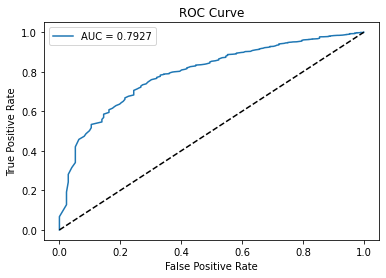

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [30]:
#membuat dataframe roc curve
roccurve = pd.DataFrame({'fpr' : fpr,
                  'tpr' : tpr,
                  'threshold' : tr})
roccurve[(roccurve.threshold >= 0.61) & (roccurve.threshold <= 0.61)]
roccurve.to_csv('roccurve.csv')

#membuat dataframe yg y_pred y_act untuk test
testsnr10 = pd.DataFrame({'y_actual' : y_test,
                         'y_predict_proba' : y_pred_proba})
testsnr10.to_csv('testsnr10.csv')

#membuat dataframe yg y_pred y_act untuk train
y_pred_train = rfc.predict_proba(X_train)[:][:,1]
trainsnr10 = pd.DataFrame({'y_actual' : y_train,
                          'y_predict_proba' : y_pred_train})
trainsnr10.to_csv('trainsnr10.csv')

In [32]:
roccurve[(roccurve.threshold >= 0.8) & (roccurve.threshold <= 0.8)]

,fpr,tpr,threshold
60,0.418605,0.81571,0.8


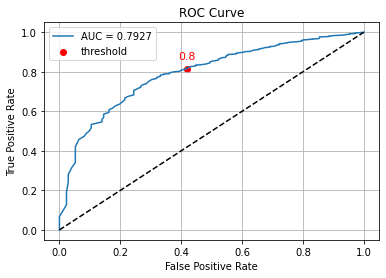

In [33]:
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.scatter(x = 0.418605, y = 0.81571, color = 'r',  label = 'threshold')
plt.annotate('0.8', xy=[0.418605, 0.86571],  ha = 'center', color='r', size = 11)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

In [34]:
y_pred = []
for i in y_pred_proba:
    if i >= 0.8 :
        y_pred.append(1)
    elif i < 0.8 :
        y_pred.append(0)
print (y_pred_proba)

[0.87666667 0.90666667 0.97333333 ... 0.99666667 0.93       0.99666667]


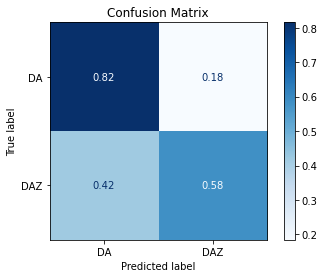

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0], normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [36]:
df_all_features.to_csv('df_all_features_snr10.csv',index=False)

In [37]:
wd_subclass = []
for i in testsnr10.y_actual :
    if i == 0:
        wd_subclass.append('Katai putih DAZ')
    elif i == 1 :
        wd_subclass.append('Katai putih DA')
testsnr10['wd_subclass'] = wd_subclass

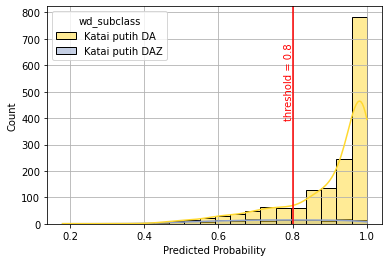

In [41]:
#plt.figure(figsize=(14,7))
sns.histplot(x=testsnr10.y_predict_proba, kde=True, hue = testsnr10.wd_subclass, palette = 'Set2_r', bins=20)
plt.axvline(x = 0.8, color = 'r', label = 'threshold = 0.8')
plt.annotate('threshold = 0.8', xy=[0.79, 400],  ha = 'center', rotation = 90, color='r', size = 10)
plt.xlabel('Predicted Probability')
plt.grid()

# SNR 50

In [42]:
snr50 = snr50[['wd_subclass','obsid']]

In [43]:
snr50 = pd.merge(snr50, data, on = "obsid", how = "inner")

In [44]:
print('jumlah data dengan snr <= 50 : '+str(len(snr50)))
print('jumlah sub-kelas DA : ' + str(len(snr50[snr50.wd_subclass_x == 'DA'])))
print('jumlah sub-kelas DAZ : ' + str(len(snr50[snr50.wd_subclass_x == 'DAZ'])))

jumlah data dengan snr <= 50 : 4199
jumlah sub-kelas DA : 3845
jumlah sub-kelas DAZ : 354


### Train-test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = snr50.drop(['wd_subclass_x','obsid','wd_subclass_y'], axis=1)
y = snr50['wd_subclass_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape

((3359, 2410), (840, 2410))

### Training

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc = RandomForestClassifier(n_estimators=300, max_features = 75)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=75, n_estimators=300)

In [74]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
47,3889.5566,0.005065
49,3891.3484,0.004631
50,3892.2444,0.004198
46,3888.6611,0.002871
51,3893.1409,0.002771
...,...,...
1236,5114.464,0.000059
1461,5386.419,0.000050
1136,4998.0444,0.000049
1360,5262.597,0.000045


### Validation

In [75]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### AUC

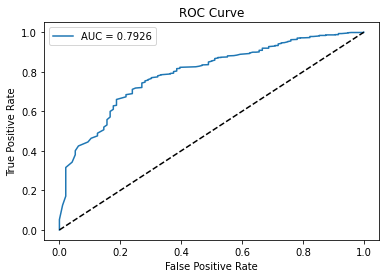

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [77]:
#membuat dataframe roc curve
roccurve = pd.DataFrame({'fpr' : fpr,
                  'tpr' : tpr,
                  'threshold' : tr})
roccurve[(roccurve.threshold >= 0.61) & (roccurve.threshold <= 0.61)]
roccurve.to_csv('roccurvesnr50.csv')

#membuat dataframe yg y_pred y_act untuk test
testsnr10 = pd.DataFrame({'y_actual' : y_test,
                         'y_predict_proba' : y_pred_proba})
testsnr10.to_csv('testsnr50.csv')

#membuat dataframe yg y_pred y_act untuk train
y_pred_train = rfc.predict_proba(X_train)[:][:,1]
trainsnr10 = pd.DataFrame({'y_actual' : y_train,
                          'y_predict_proba' : y_pred_train})
trainsnr10.to_csv('trainsnr50.csv')

In [84]:
roccurve[(roccurve.threshold >= 0.79) & (roccurve.threshold <= 0.8)]

,fpr,tpr,threshold
59,0.364583,0.791667,0.800000
60,0.375000,0.793011,0.796667
61,0.375000,0.801075,0.790000


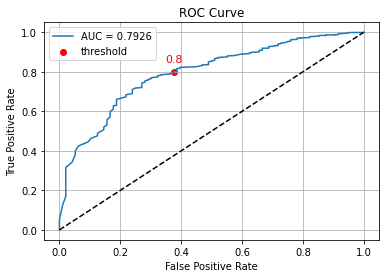

In [85]:
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.scatter(x = 0.375000, y = 0.801075, color = 'r',  label = 'threshold')
plt.annotate('0.8', xy=[0.375000, 0.851075],  ha = 'center', color='r', size = 11)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

In [86]:
y_pred = []
for i in y_pred_proba:
    if i >= 0.79 :
        y_pred.append(1)
    elif i < 0.79 :
        y_pred.append(0)

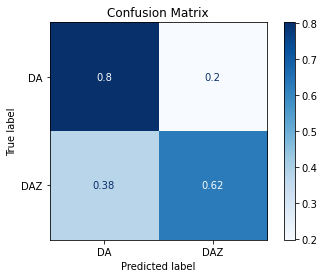

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0], normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [88]:
#Save data

df_all_features.to_csv('df_all_features_snr50.csv',index=False)
prediction = pd.DataFrame(y_pred_proba, columns=['predictions']).to_csv('predictionsnr50.csv',index=False)

In [89]:
wd_subclass = []
for i in testsnr10.y_actual :
    if i == 0:
        wd_subclass.append('Katai putih DAZ')
    elif i == 1 :
        wd_subclass.append('Katai putih DA')
testsnr10['wd_subclass'] = wd_subclass

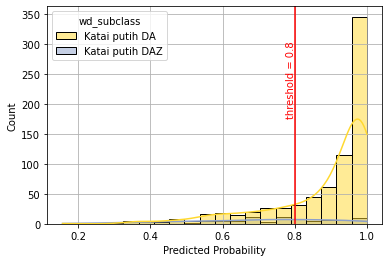

In [92]:
#plt.figure(figsize=(14,7))
sns.histplot(x=testsnr10.y_predict_proba, kde=True, hue = testsnr10.wd_subclass, palette = 'Set2_r', bins=20)
plt.axvline(x = 0.8, color = 'r', label = 'threshold = 0.8')
plt.annotate('threshold = 0.8', xy=[0.79, 180],  ha = 'center', rotation = 90, color='r', size = 10)
plt.xlabel('Predicted Probability')
plt.grid()

# SNR 100

In [93]:
snr100 = snr100[['wd_subclass','obsid']]

In [94]:
snr100 = pd.merge(snr100, data, on = "obsid", how = "inner")

In [95]:
print('jumlah data dengan snr <= 100 : '+str(len(snr100)))
print('jumlah sub-kelas DA : ' + str(len(snr100[snr100.wd_subclass_x == 'DA'])))
print('jumlah sub-kelas DAZ : ' + str(len(snr100[snr100.wd_subclass_x == 'DAZ'])))

jumlah data dengan snr <= 100 : 531
jumlah sub-kelas DA : 507
jumlah sub-kelas DAZ : 24


### Train test split

In [125]:
from sklearn.model_selection import train_test_split

In [197]:
X = snr100.drop(['wd_subclass_x','obsid','wd_subclass_y'], axis=1)
y = snr100['wd_subclass_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
X_train.shape, X_test.shape

((424, 2410), (107, 2410))

### Training

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rfc = RandomForestClassifier(n_estimators=300, max_features = 75)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=75, n_estimators=300)

In [201]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
152,3984.7412,0.005948
80,3919.224,0.005173
4,3851.2358,0.004639
130,3964.6067,0.004350
73,3912.9124,0.004214
...,...,...
1508,5445.028,0.000000
1509,5446.2817,0.000000
1512,5450.0454,0.000000
754,4577.202,0.000000


### Validation

In [202]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### AUC

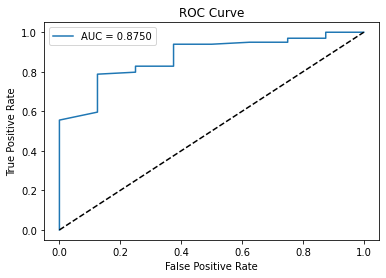

In [203]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [204]:
#membuat dataframe roc curve
roccurve = pd.DataFrame({'fpr' : fpr,
                  'tpr' : tpr,
                  'threshold' : tr})
roccurve[(roccurve.threshold >= 0.61) & (roccurve.threshold <= 0.61)]
roccurve.to_csv('roccurvesnr100.csv')

#membuat dataframe yg y_pred y_act untuk test
testsnr10 = pd.DataFrame({'y_actual' : y_test,
                         'y_predict_proba' : y_pred_proba})
testsnr10.to_csv('testsnr100.csv')

#membuat dataframe yg y_pred y_act untuk train
y_pred_train = rfc.predict_proba(X_train)[:][:,1]
trainsnr10 = pd.DataFrame({'y_actual' : y_train,
                          'y_predict_proba' : y_pred_train})
trainsnr10.to_csv('trainsnr100.csv')

In [205]:
roccurve[(roccurve.threshold >= 0.84) & (roccurve.threshold <= 0.88)]

,fpr,tpr,threshold
21,0.375,0.919192,0.880000
22,0.375,0.939394,0.863333


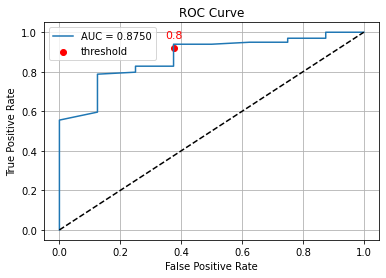

In [206]:
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.scatter(x = 0.375, y = 0.919192, color = 'r',  label = 'threshold')
plt.annotate('0.8', xy=[0.375, 0.969192],  ha = 'center', color='r', size = 11)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

In [207]:
y_pred = []
for i in y_pred_proba:
    if i >= 0.87 :
        y_pred.append(1)
    elif i < 0.87 :
        y_pred.append(0)

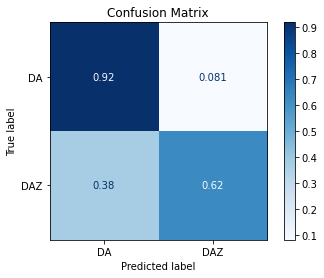

In [208]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0], normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [213]:
#Save data

df_all_features.to_csv('df_all_features_snr100.csv',index=False)
prediction = pd.DataFrame(y_pred_proba, columns=['predictions']).to_csv('predictionsnr100.csv',index=False)

In [210]:
wd_subclass = []
for i in testsnr10.y_actual :
    if i == 0:
        wd_subclass.append('Katai putih DAZ')
    elif i == 1 :
        wd_subclass.append('Katai putih DA')
testsnr10['wd_subclass'] = wd_subclass

In [1]:
#plt.figure(figsize=(14,7))
sns.histplot(x=testsnr10.y_predict_proba, kde=True, hue = testsnr10.wd_subclass, palette = 'Set2_r', bins=10)
plt.axvline(x = 0.87, color = 'r', label = 'threshold = 0.87')
plt.annotate('threshold = 0.87', xy=[0.86, 25],  ha = 'center', rotation = 90, color='r', size = 10)
plt.xlabel('Predicted Probability')
plt.grid()

NameError: name 'sns' is not defined